<h1 align="center">Momentos de una variable aleatoria</h1>
<div align="right">David A. Miranda, PhD<br>2022</div>

## 1. Importar librerías

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. Planteamiento del problema

Sean unos datos obtenidos de muestrear (en este caso la muestra se toma de una simulaciíon) la presión arterial sistólica de un cierto grupo de personas. Determine la distribución de frecuencias de la presión artelial sistólica para la muestra incluida en el estudio y realice una descripción estadística de la misma emplenado los primeros momentos centrales.

### 2.1. Distribución de frecuencia de una variable aleatoria

La distribución de frecuencia se puede representar como una tabla (o gráfica) donde se muestra la frecuencia de la ocurrencia de ciertos resultados en una muestra, agrupados en ciertos intervalos. En este contexto, muestra se refiere a un conjunto de datos tomado de un conjunto mayor. Además, una variable aleatoria $X$ representa un fenómeno donde las observaciones corresponden con los valores $x$; en tal sentido, para una cierta variable aleatoria $X$, como la de este ejemplo, se puede tomar una muestra $\{x_1, x_2, ..., x_N\}$ que, en este caso, sería la presión arterial sistólica.

Para construir la distribución de frecuencias es necesario determinar el número de observaciones $x$ que caen en cada intervalo entre $x_k$ y $x_k + \Delta x_k$; cada intervalo se identificará con un valor $\chi_k$, con $k<N$, tal que $\chi_k \in [x_k, x_k+\Delta x_k)$. Note que se asume que las observaciones asociadas a un cierto $\chi_k$ corresponden con el conjunto de valores $\{x_{k1}, x_{k2}, ..., x_{M_k}\}$ dentro del intervalo $[x_k, x_k + \Delta x_k)$. En consecuencia, la distribución de frecuencia es la relación formada por el valor representativo $\chi_k$ (se suele tomar el menor valor del intervalo) y el número de observaciones $M_k$ en el conjunto $\{x_{k1}, x_{k2}, ..., x_{M_k}\}$, es decir, $\{ (\chi_k, M_k) \}$. Por simplicidad, se define un ancho de intervalo uniforme de la forma,

$$ \Delta x_k = \Delta x = \frac{x_{máximo} - x_{mínimo}}{N}$$

Dado que se requiere conocer la probabilidad de ocurrencia $p(\chi_k)$ de un intervalo, esta se puede aproximar como,

$$p(\chi_k) \approx \frac{M_k}{N}$$


### 2.2. Momentos de una variable aleatoria

Los momentos de una variable aleatoria $X$ se pueden definir alrededor del origen o de la media, siendo estos últimos los momentos centrales de la variable aleatoria. 

#### 2.2.1. Momentos alrededor del origen

De esta manera, el r-ésimo momento $\mu'_r$ de la variable aleatoria $X$, alrededor del origen, se define como:

$$\mu'_r = E(X^r) = \langle x^r \rangle = \sum_x x^r p(x)$$

Donde $x$ son los valores que toma la variable aleatoria $X$ en las diferentes observaciones realizadas y $p(x)$ es la probabilidad que $X$ tome un valor entre $x$ y $x+dx$ al realizar una cierta observación.

#### 2.2.2. Momentos centrales

El r-ésimo momento central $\mu_r$ de una variable aleatoria $X$ se calcula alrededor de la media $\mu = \mu'_1 = \langle x \rangle$,

$$\mu_r = E[(X - \mu'_1)^r] = \langle (x-\mu)^r \rangle = \sum_x (x - \mu)^r p(x)$$

#### 2.2.3. Varianza y desviación estándar

La varianza $\sigma^2$ corresponde con el segundo momento central y la desviación estándar $\sigma$, con la raiz cuadrada de la varianza.

$$\sigma^2 = var(X) = \mu_2 = E[(X-\mu)^2] = \langle (x - \mu)^2 \rangle = \sum_x (x-\mu)^2 p(x)$$

$$\sigma = std(X) = \sqrt{var(X)}$$

## 3. Definiciones y métodos

In [39]:
N = 400 # Número de pacientes
p_mean = 120
p_std = 2.5
bandas = 50 # Número de bandas para el histograma 

In [40]:
def simulate_arterial_pressure(mean_pressure=p_mean, std_pressure=p_std, size=N, decimals=1):
    normal_dist = np.random.normal(
            loc=mean_pressure, 
            scale=std_pressure, 
            size=size) # Distribución normal -> Gaussiana
    presion = np.round(normal_dist, decimals=decimals) # Redondeo 
    paciente = np.arange(N) + 1 # Identificación de cada paciente
    data = pd.DataFrame({'Presión':presion, 'Paciente':paciente}) # Datos en un DataFrame de Pandas
    #data.to_clipboard()  # Con este comando se dejan los datos en el clipboard y pueden ser pegados en otra app
    return data

In [41]:
def manual_hist(data, bandas):
    presion = data['Presión'].to_numpy()
    x  = []
    ys = np.zeros(bandas)
    x0 = presion.min()
    for k in range(bandas):
        deltaB = (presion.max() - presion.min())/float(bandas)
        xk = presion.min() + (k+1)*deltaB
        ys[k] = np.sum((presion >= x0) & (presion < xk))
        x.append(xk)
        x0 = xk
    ys[-1] += np.sum(presion == presion.max())
    return x, ys

## 4. Resultados y figuras

In [42]:
data = simulate_arterial_pressure()
presion = data['Presión'].to_numpy()
x, ys = manual_hist(data, bandas)

### 4.1. Media

In [43]:
p = ys / float(N)  # Probabilidad para cada banda
media_calculo = sum(x*p)
media_numpy   = presion.mean()
print('Media por cálculo:\t%0.1f [mm Hg],\tnumpy: %0.1f [mm Hg]' % (media_calculo, media_numpy))

Media por cálculo:	120.2 [mm Hg],	numpy: 120.0 [mm Hg]


### 4.2. Varianza

In [44]:
varianza_calculo = np.sum((x - media_calculo)**2 * p)
varianza_numpy   = presion.var()
print('Varianza por cálculo:\t%0.1f [mm Hg],\tnumpy: %0.1f [mm Hg]' % (varianza_calculo, varianza_numpy))

Varianza por cálculo:	5.7 [mm Hg],	numpy: 5.7 [mm Hg]


### 4.3. Desviación estándar

In [45]:
std_calculo = np.sqrt(varianza_calculo)
std_numpy   = presion.std()
print('Desviación estándar:\t%0.1f [mm Hg],\tnumpy: %0.1f [mm Hg]' % (std_calculo, std_numpy))

Desviación estándar:	2.4 [mm Hg],	numpy: 2.4 [mm Hg]


### 4.4. Descripción estadística usando Pandas

In [46]:
data['Presión'].describe()

count    400.000000
mean     120.041000
std        2.395227
min      112.800000
25%      118.500000
50%      119.900000
75%      121.700000
max      129.200000
Name: Presión, dtype: float64

### 4.5. Figuras

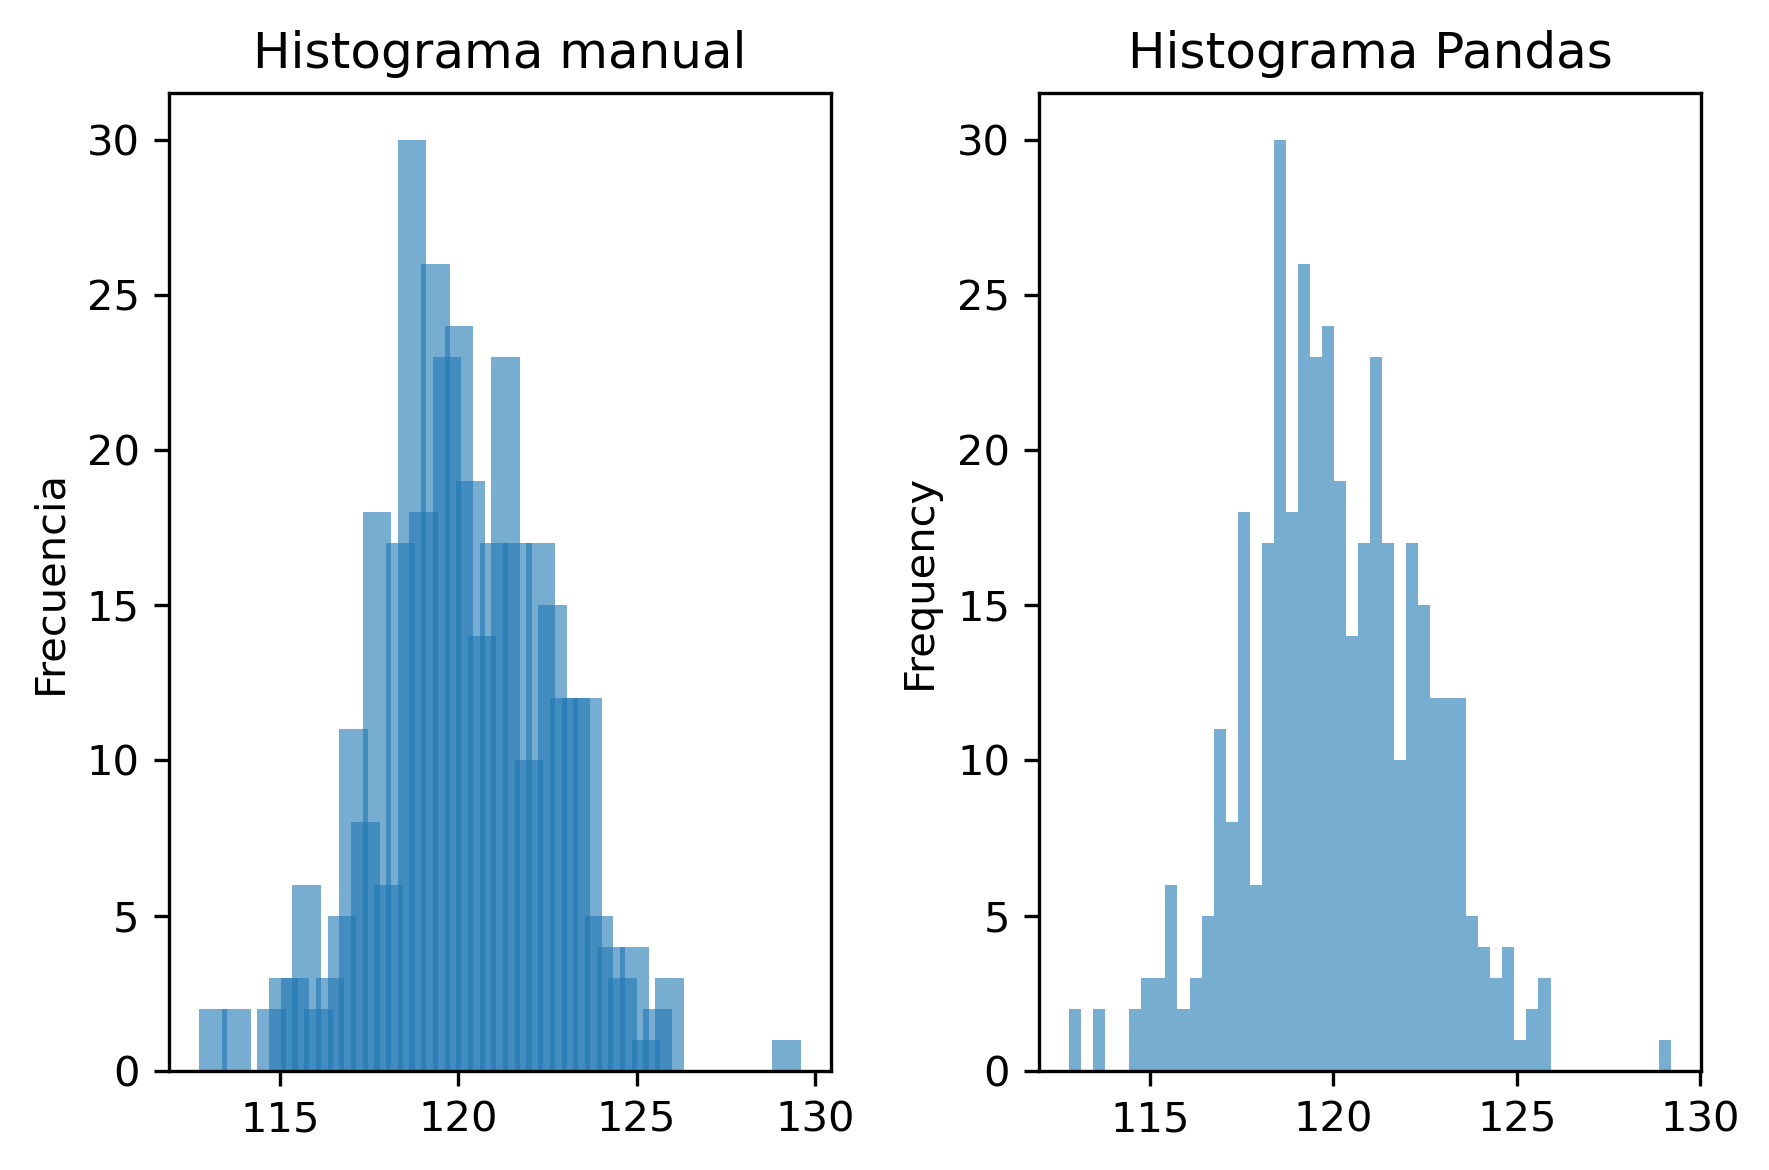

In [47]:
plt.figure(dpi=300)

#### Histograma manaual ####
plt.subplot(121)
plt.bar(x, ys, alpha=0.6)
plt.ylabel('Frecuencia')
plt.title('Histograma manual')
#############################

#### Histograma con Pandas ####
plt.subplot(122)
ax = plt.gca()
data['Presión'].plot.hist(bins=bandas, alpha=0.6, ax = ax)
_ = plt.title('Histograma Pandas')
###############################
plt.tight_layout()

## 5. Preguntas de autoexplicación

5.1. Describa, con sus propias palabras, el planteamiento del problema y cómo se resuelve en este ejemplo.

5.2. La expresión $p(\chi_k) \approx \frac{M_k}{N}$ relaciona la probabilidad $p(\chi_k)$ de obtener una observación en el intervalo identificado con $\chi_k$, con los valores determinados para la distribución de frecuencias $\frac{M_k}{N}$. Describa, con sus palabras, por qué esta aproximación es válida y cuándo deja de ser una aproximación para convertirse en un valor exacto (igualdad).

5.3. Describa qué es una distribución normal, cómo se relaciona con una distribución gaussiana y realice una gráfica con la cual explique los diferentes parámetros de dicha distribución.

5.4. Cuando la distribución de probabilidad de una muestra es normal, la media se puede calcular sumando los datos y dividiendo por el número de datos. Muestre un ejemplo (para otra distribución de probabilidad) donde la suma de lo datos divididas por su número sea diferente a la media y explique por qué ocurre dicha diferencia.

5.5. En la solución de este ejemplo se presentaron cálculos realizados al aplicar los conceptos descritos en el ítem 2, sin embargo, también se muestran resultados obtenidos con una librería de *Python* llamada *Numpy*. Describa cómo calcula *Numpy* la media, desviación estándar y varianza de una cierta muestra.

5.6. Interprete el resultado obtenido al utilizar el método *describe* de *Pandas*.

5.7.  Describa cómo se obtuvieron cada una de las figuras e interprete dichas figuras.

5.8. ¿Qué diferencias y similitudes observa entre el histograma manual y el histograma Pandas?

End!